In [1]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display
import json
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:

#import user.json as a dict
with open('user.json', "r") as f:
        user=json.load(f)

In [3]:

#tree creation
dtc = tree.DecisionTreeClassifier()

#create label encoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()



In [4]:

# creating dataframes
for i in user:
    data = user[str(i)]["data"]
    result = user[str(i)]["result"]
    dataframe = pd.DataFrame(data, columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
    resultframe = pd.DataFrame(result, columns=["favorite"])

    # generating numerical labels
    dataframe["Name"] = le1.fit_transform(dataframe["Name"])
    dataframe["Type 1"] = le2.fit_transform(dataframe["Type 1"])
    dataframe["Type 2"] = le3.fit_transform(dataframe["Type 2"])
    dataframe["Generation"] = le4.fit_transform(dataframe["Generation"])
    dataframe["legendary"] = le5.fit_transform(dataframe["legendary"])
    dataframe["color"] = le6.fit_transform(dataframe["color"])
    dataframe["first_letter"] = le7.fit_transform(dataframe["first_letter"])
    resultframe["favorite"] = le8.fit_transform(resultframe["favorite"])
    # Use of decision tree classifiers
    dtc = dtc.fit(dataframe.values, resultframe)

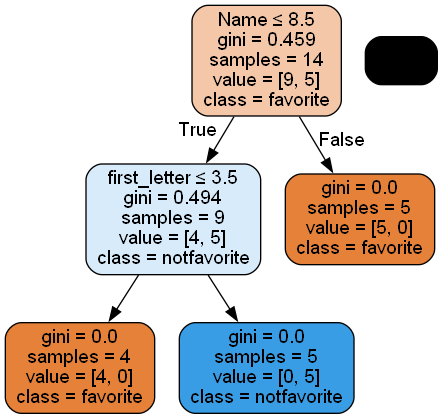

In [5]:

dot_data = tree.export_graphviz(
    dtc,
    out_file=None,
    feature_names=dataframe.columns,
    filled=True,
    rounded=True,
    class_names=le8.inverse_transform(resultframe.favorite.unique()),
    special_characters=True,
)
graph = graphviz.Source(dot_data)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

In [6]:
# Enregistrement du modèle dans un fichier
with open('prediction_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [7]:
print("Accuracy:",metrics.accuracy_score(resultframe, dtc.predict(dataframe)))

Accuracy: 1.0


c:\Users\Tototime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


c:\Users\Tototime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


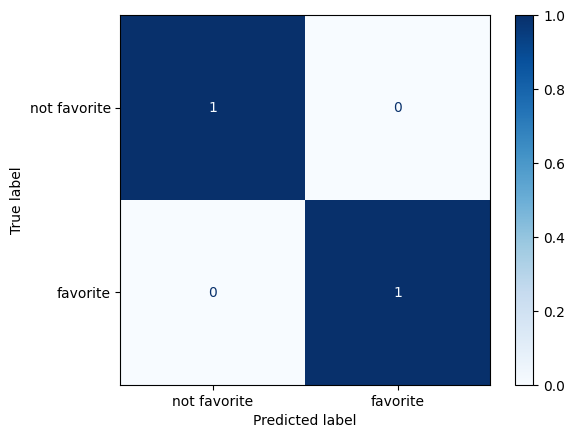

In [8]:
# creating predictions
y_pred = dtc.predict(dataframe)

# creating confusion matrix
cm = confusion_matrix(resultframe, y_pred, normalize='true')
    
# displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not favorite', 'favorite'])
disp.plot(cmap='Blues')
plt.show()